In [34]:
from influxdb_client import InfluxDBClient, Point
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# read from influxdb v2
url = "http://localhost:8086"
token = "SBBtnmyDvJS1wemb3kRL6jiYlNr4WpIEQKgqFHANzUgEDzf0JPSwGq2z5iECp57zktkNdSD6J6pkToB1KmOp0Q=="
org = "mema_org"
bucket = "mema_bucket"

# Initialize the InfluxDB client
client = InfluxDBClient(url=url, token=token, org=org)

In [36]:
# influxql query measurement hai_results in mema_bucket
query = f'from(bucket:"{bucket}") |> range(start: -156h) |> filter(fn: (r) => r._measurement == "hai_results") |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")'
df = client.query_api().query_data_frame(query)

In [37]:
df

,result,table,_start,_stop,_time,_measurement,host,accuracy,drift_detected,warning_detected
0,_result,0,2023-12-08 04:01:30.594631+00:00,2023-12-14 16:01:30.594631+00:00,2023-12-13 18:38:30.811926+00:00,hai_results,20a15260f1ad,1.0,0.0,0.0
1,_result,0,2023-12-08 04:01:30.594631+00:00,2023-12-14 16:01:30.594631+00:00,2023-12-13 18:38:30.811966+00:00,hai_results,20a15260f1ad,1.0,0.0,0.0
2,_result,0,2023-12-08 04:01:30.594631+00:00,2023-12-14 16:01:30.594631+00:00,2023-12-13 18:38:30.811969+00:00,hai_results,20a15260f1ad,1.0,0.0,0.0
3,_result,0,2023-12-08 04:01:30.594631+00:00,2023-12-14 16:01:30.594631+00:00,2023-12-13 18:38:30.811971+00:00,hai_results,20a15260f1ad,1.0,0.0,0.0
4,_result,0,2023-12-08 04:01:30.594631+00:00,2023-12-14 16:01:30.594631+00:00,2023-12-13 18:38:30.816627+00:00,hai_results,20a15260f1ad,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
43196,_result,0,2023-12-08 04:01:30.594631+00:00,2023-12-14 16:01:30.594631+00:00,2023-12-13 18:43:12.753711+00:00,hai_results,20a15260f1ad,1.0,0.0,0.0
43197,_result,0,2023-12-08 04:01:30.594631+00:00,2023-12-14 16:01:30.594631+00:00,2023-12-13 18:43:12.760632+00:00,hai_results,20a15260f1ad,1.0,0.0,0.0
43198,_result,0,2023-12-08 04:01:30.594631+00:00,2023-12-14 16:01:30.594631+00:00,2023-12-13 18:43:12.762254+00:00,hai_results,20a15260f1ad,1.0,0.0,0.0
43199,_result,0,2023-12-08 04:01:30.594631+00:00,2023-12-14 16:01:30.594631+00:00,2023-12-13 18:43:12.776508+00:00,hai_results,20a15260f1ad,1.0,0.0,0.0


In [50]:
# set font size 
plt.rcParams.update({'font.size': 14})

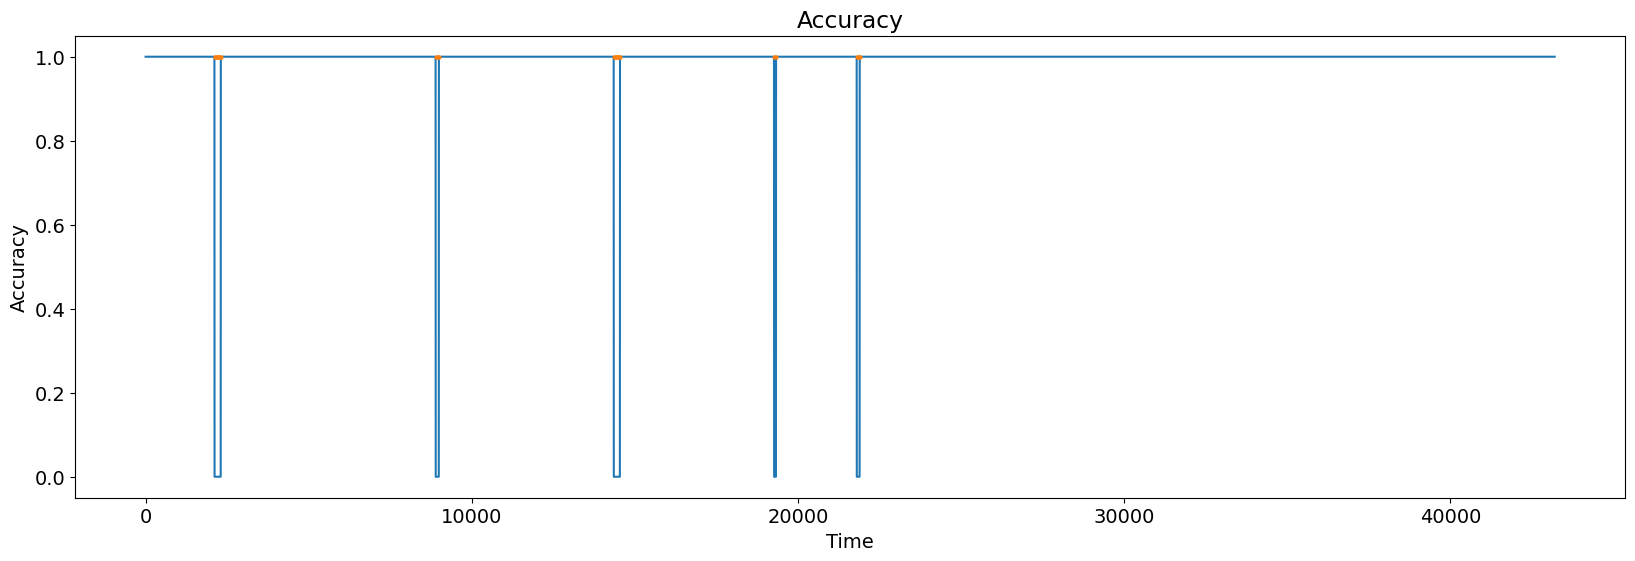

In [51]:
# set figure size
plt.figure(figsize=(20,6))
# plot accuracy
plt.plot(df['accuracy'])
plt.plot(df[df['drift_detected']>0]['drift_detected'], linewidth=0, marker='o', markersize=2)
# set title and labels
plt.title('Accuracy')
plt.xlabel('Time')
plt.ylabel('Accuracy')
# show plot
plt.show()


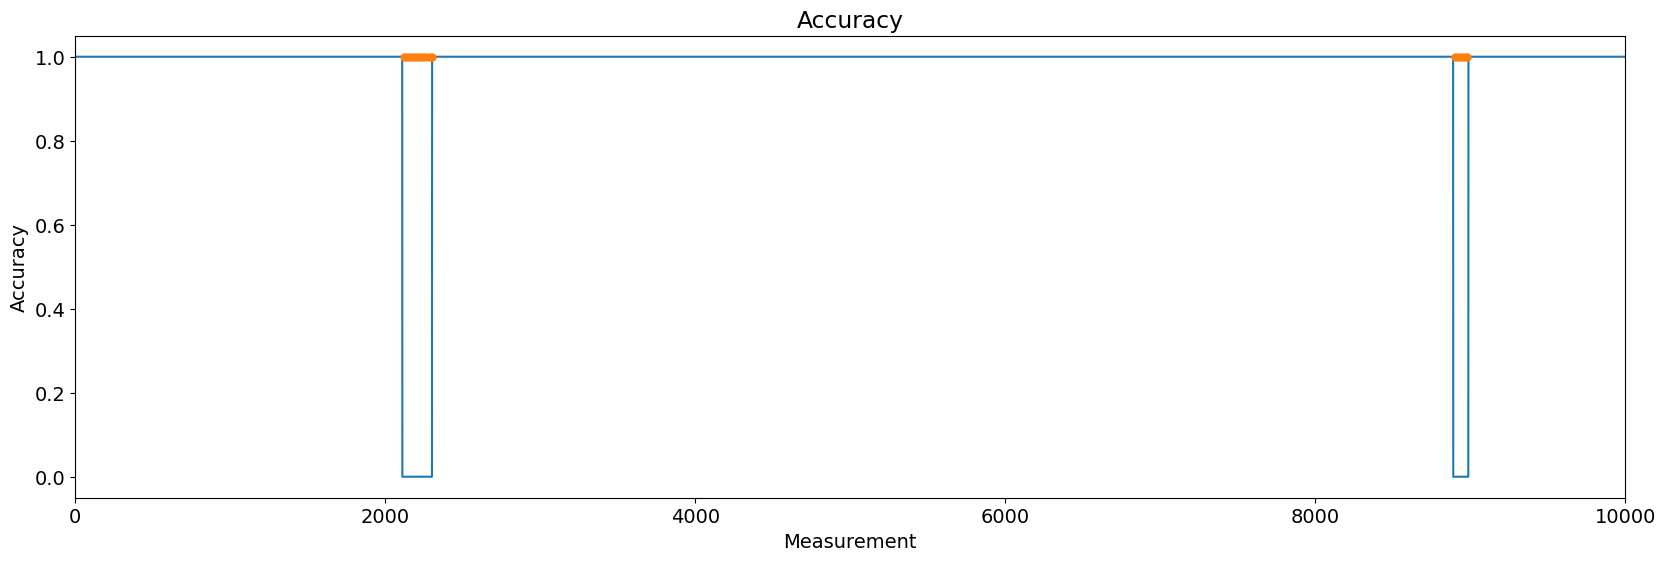

In [52]:
# set figure size
plt.figure(figsize=(20,6))
# plot accuracy
plt.plot(df['accuracy'], label='accuracy')
plt.plot(df[df['drift_detected']>0]['drift_detected'], linewidth=0, marker='o', markersize=5, label='drift_detected')
# set title and labels
plt.title('Accuracy')
plt.xlabel('Measurement')
plt.ylabel('Accuracy')


# set x limit
plt.xlim(0, 10000)
# show plot
plt.show()

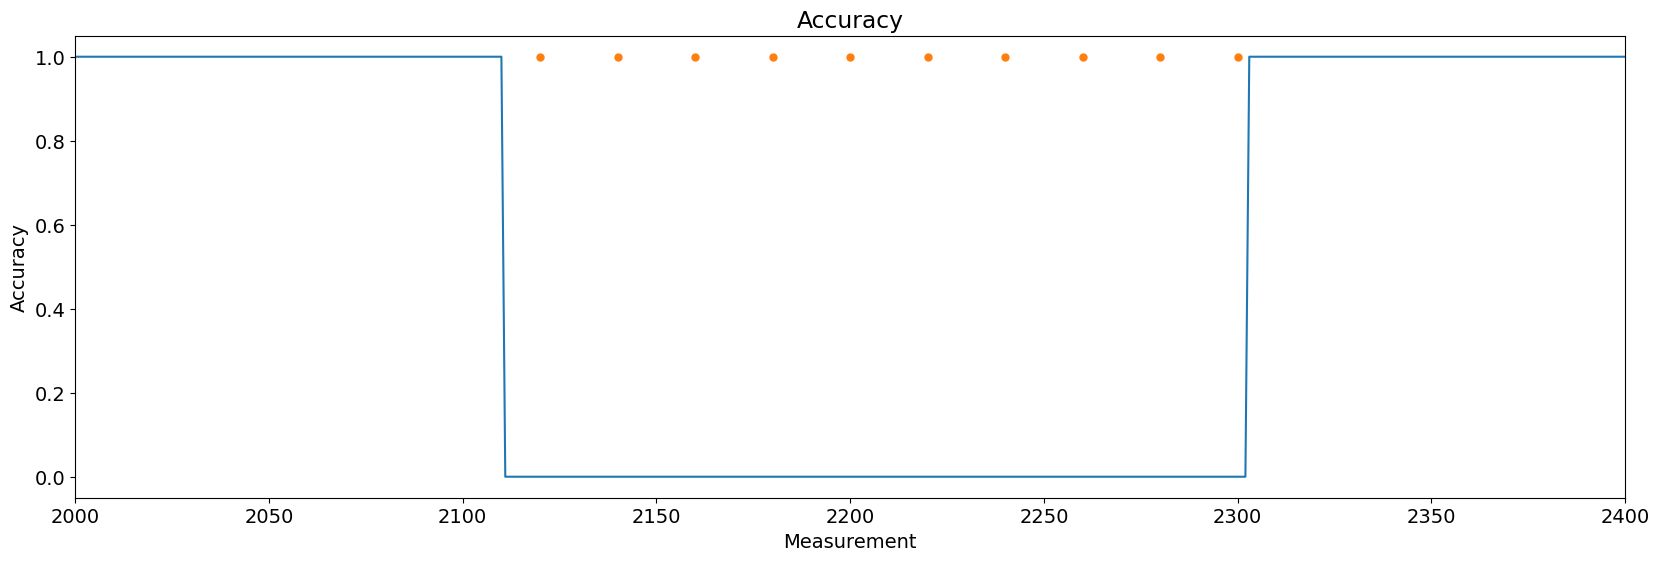

In [53]:
# set figure size
plt.figure(figsize=(20,6))
# plot accuracy
plt.plot(df['accuracy'])
plt.plot(df[df['drift_detected']>0]['drift_detected'], linewidth=0, marker='o', markersize=5)
# set title and labels
plt.title('Accuracy')
plt.xlabel('Measurement')
plt.ylabel('Accuracy')

# set x limit
plt.xlim(2000, 2400)
# show plot
plt.show()